<a href="https://colab.research.google.com/github/Mrym17/MachineLearning-with-python/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Dataset**

In [ ]:
data=pd.read_csv('/content/Social Media Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# **Data Visualization**

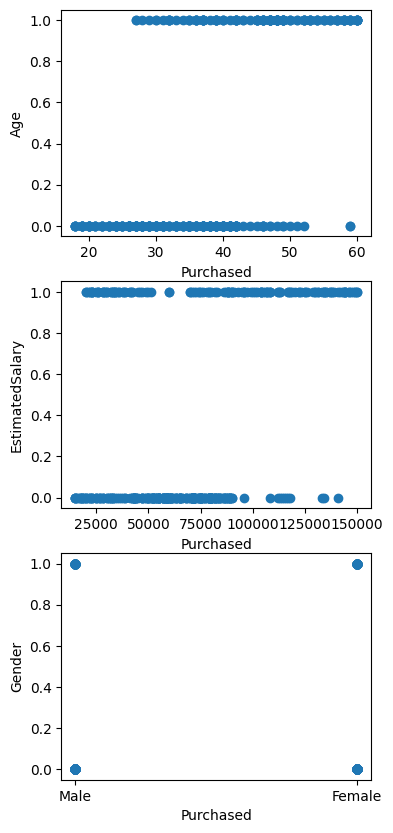

In [ ]:
# Pair-wise Scatter Plots

fig, ax = plt.subplots(3, figsize=(4, 10))
ax[0].scatter(x = data['Age'], y = data['Purchased'])
ax[0].set_xlabel("Purchased")
ax[0].set_ylabel("Age")

ax[1].scatter(x = data['EstimatedSalary'], y = data['Purchased'])
ax[1].set_xlabel("Purchased")
ax[1].set_ylabel("EstimatedSalary")
ax[2].scatter(x = data['Gender'], y = data['Purchased'])
ax[2].set_xlabel("Purchased")
ax[2].set_ylabel("Gender")



plt.show()

## **Date Preprocessing**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# **Data Split**

In [ ]:
X=data.iloc[:,2:4].values

In [ ]:
X.shape

(400, 2)

In [ ]:
y=data.iloc[:,-1].values

In [ ]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
X_train.shape

(320, 2)

In [ ]:

X_test.shape

(80, 2)

# **Scaling/Normalizing**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 2.01733374e+00,  1.46119561e-01],
       [ 1.06491887e+00,  8.81427977e-02],
       [-1.03039383e+00, -1.56419495e+00],
       [-1.73220454e-01,  1.36363159e+00],
       [ 1.12504006e-01,  1.82744569e+00],
       [ 2.07745493e-01, -4.04659689e-01],
       [-2.68461941e-01,  1.17765300e-03],
       [ 1.12504006e-01,  7.25887192e-01],
       [ 1.92209225e+00, -9.55438939e-01],
       [ 7.79194413e-01, -8.68473794e-01],
       [-1.12563532e+00, -1.04240408e+00],
       [ 3.02986979e-01,  2.33084706e-01],
       [ 1.82685077e+00,  1.47958511e+00],
       [-2.68461941e-01, -9.26450557e-01],
       [-2.68461941e-01,  5.91544161e-02],
       [ 1.12504006e-01,  1.17765300e-03],
       [ 1.92209225e+00, -6.94543505e-01],
       [ 2.11257523e+00, -8.39485413e-01],
       [ 1.06491887e+00, -1.72752636e-01],
       [-1.12563532e+00, -1.62217172e+00],
       [-1.12563532e+00, -1.18734599e+00],
       [ 7.79194413e-01, -1.12936923e+00],
       [-1.79232573e+00, -1.30329952e+00],
       [-1.

In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[ 6.83952926e-01, -1.41925304e+00],
       [-5.54186400e-01,  8.41840719e-01],
       [-1.73220454e-01,  1.17131179e-01],
       [ 2.07745493e-01,  1.17765300e-03],
       [-3.63703427e-01, -8.10497031e-01],
       [ 1.72625195e-02,  2.62073087e-01],
       [ 1.16016036e+00, -7.81508649e-01],
       [ 1.72625195e-02,  1.21868968e+00],
       [-9.35152347e-01,  4.64991758e-01],
       [-4.58944914e-01, -1.24532275e+00],
       [-1.88756721e+00,  4.36003377e-01],
       [ 3.98228466e-01, -5.20613215e-01],
       [-8.39910860e-01,  3.49038232e-01],
       [-1.31611829e+00, -1.27431114e+00],
       [-1.50660127e+00, -2.30729400e-01],
       [-6.49427887e-01, -1.53520657e+00],
       [-2.68461941e-01, -4.62636452e-01],
       [ 3.02986979e-01,  3.01660346e-02],
       [ 3.98228466e-01, -2.01741018e-01],
       [-3.63703427e-01, -8.10497031e-01],
       [ 1.12504006e-01,  2.33084706e-01],
       [-9.35152347e-01, -3.46682926e-01],
       [-7.44669374e-01, -1.56419495e+00],
       [-7.

# **Choosing K**

In [ ]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [ ]:
k=17

# Training 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
y_pred.shape

(80,)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[48,  5],
       [ 7, 20]])

# **For Different K Values**

In [ ]:
accuracy=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
    

In [ ]:
accuracy

[0.8625, 0.85, 0.9, 0.85, 0.85, 0.85, 0.8625, 0.875, 0.8625]

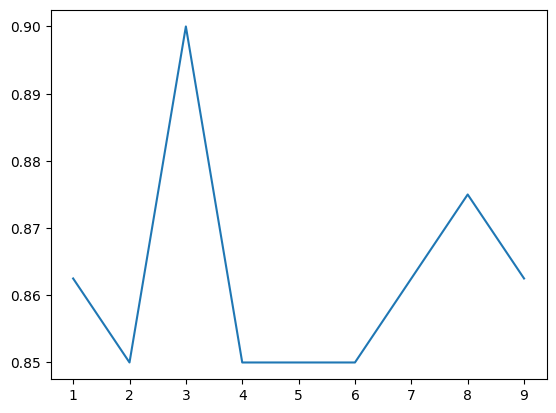

In [ ]:
plt.plot(range(1,10),accuracy)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

# **Predicting Output**

In [ ]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [ ]:
predict_output()

Enter the age17
Enter the salary15000


'Will not purchase'

# **Plotting Decision boundary**

In [ ]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

In [ ]:
YY.shape

(592, 601)

In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

Text(0, 0.5, 'Estimated Salary')

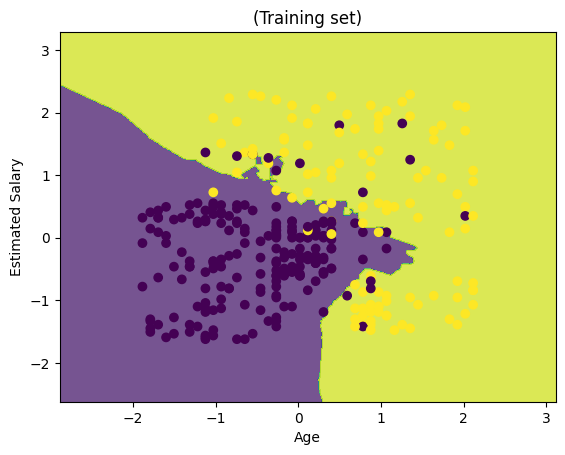

In [ ]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.title('(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')


In [ ]:
m=np.arange(start=X_test[:,0].min()-1, stop=X_test[:,0].max()+1, step=0.01)
n=np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step=0.01)
XX,YY=np.meshgrid(a,b)

In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
labels=knn.predict(input_array)

Text(0, 0.5, 'Estimated Salary')

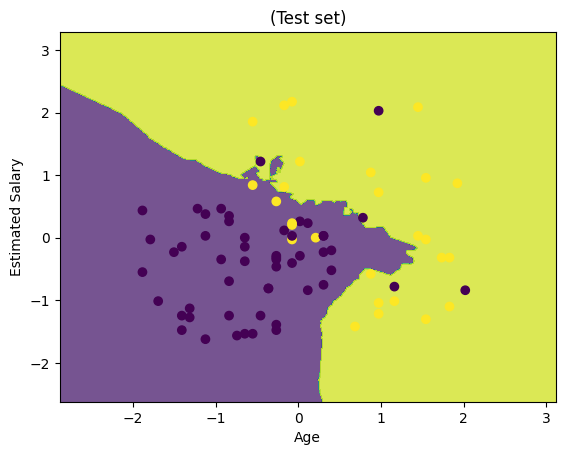

In [ ]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test)
plt.title('(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')